In [6]:
import json
import csv
import tweepy
import re
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import pie, axis, show


In [7]:

lines = []
with open("ISRO.json") as file_in:
    for line in file_in:
        lines.append(json.loads(line))

df = pd.DataFrame(lines)


## Data Columns

In [8]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

## Test Tweet

In [9]:
df.iloc[90]['tweet']

'@isro Congratulations team #ISRO...'

## Language analysis of tweets

In [10]:
lang_df = df.groupby(['language']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).reset_index(drop=True)
lang_df.head(5)

,language,counts
0,en,7391
1,hi,1113
2,und,1022
3,ta,393
4,gu,172


In [11]:
lang_arr = lang_df['language'].head(10).to_list()
count_arr = lang_df['counts'].head(10).to_list()
lang_arr
lang_arr.append('others')
lang_arr
count_arr.append(0)
for i in range(10,37):
    count_arr[-1] = count_arr[-1] + lang_df['counts'][i]
lang_arr, count_arr
print(lang_arr, count_arr)

['en', 'hi', 'und', 'ta', 'gu', 'mr', 'kn', 'te', 'in', 'es', 'others'] [7391, 1113, 1022, 393, 172, 80, 74, 69, 61, 40, 256]


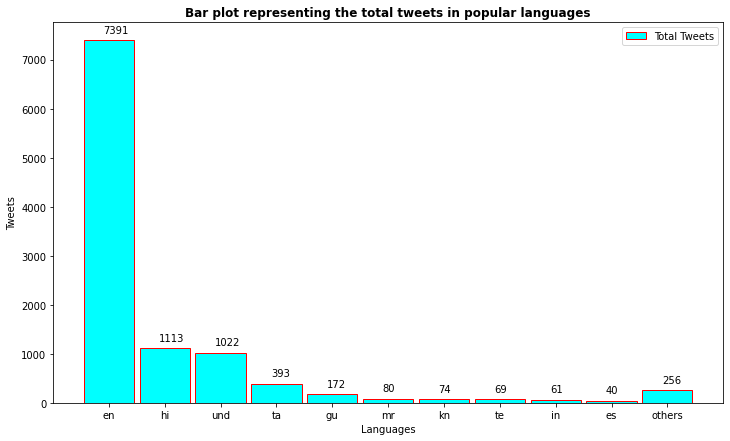

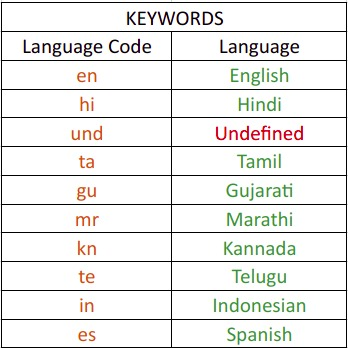

In [20]:
plt.figure(figsize = (12,7))
plt.bar(lang_arr, count_arr, width= 0.9, align='center',color='cyan', edgecolor = 'red')
i = 1.0
j = 150

for i in range(len(lang_arr)):
    plt.annotate(count_arr[i], (-0.1 + i, count_arr[i] + j))
plt.legend(labels = ['Total Tweets'])
plt.title("Bar plot representing the total tweets in popular languages",fontweight="bold")
plt.xlabel('Languages')
plt.ylabel('Tweets')
plt.show()
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "isro_lang.jpeg", width = 250, height = 150)

## Extracting user data for users who tweeted

In [21]:
lines = []

# change name to user_data
with open("user_data.json") as file_in:
    for line in file_in:
        lines.append(json.loads(line))
user_df = pd.DataFrame(lines)

In [22]:
user_df.columns

Index(['id', 'name', 'username', 'bio', 'location', 'url', 'join_date',
       'join_time', 'tweets', 'following', 'followers', 'likes', 'media',
       'private', 'verified', 'profile_image_url', 'background_image'],
      dtype='object')

## User Follower Count Analysis

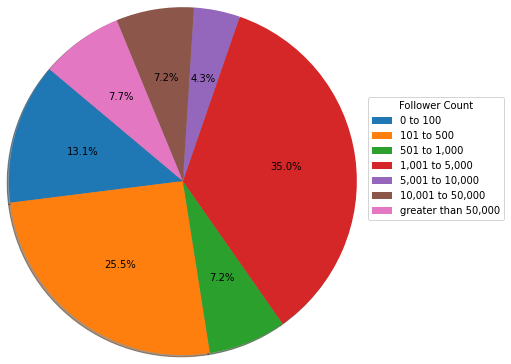

In [24]:
x_value = [100, 500, 1000, 5000, 10000, 50_000, 10_00_000]
y_value = []
for i in x_value:
    y_value.append(0)
  
for i in user_df['followers']:
    for idx,j in enumerate(x_value):
        if j > i:
            y_value[idx] = y_value[idx] + 1
            break
            

plt.pie(y_value, shadow=True, startangle=140, radius=2,  autopct='%1.1f%%')
legend_array = ['0 to 100', '101 to 500', '501 to 1,000', '1,001 to 5,000', '5,001 to 10,000','10,001 to 50,000', 'greater than 50,000' ]
plt.legend(legend_array, loc="lower right", title='Follower Count', bbox_to_anchor=(2.0, 0.3))
plt.show()

## User Following Count Analysis

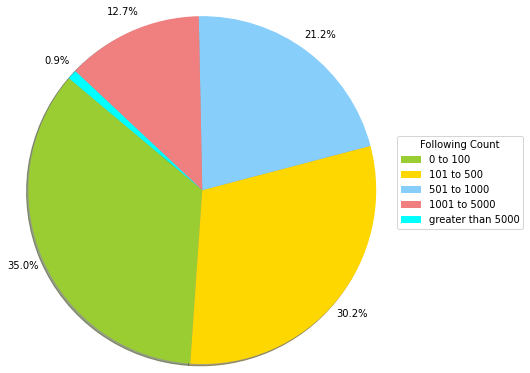

In [16]:
x_value = [100, 500, 1000, 5000, 10000]
y_value = []
for i in x_value:
    y_value.append(0)
  
for i in user_df['following']:
    for idx,j in enumerate(x_value):
        if j > i:
            y_value[idx] = y_value[idx] + 1
            break
            
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'cyan']
plt.pie(y_value, shadow=True, startangle=140, radius=2,  autopct='%1.1f%%', pctdistance=1.12, colors=colors)
legend_array = ['0 to 100', '101 to 500', '501 to 1000', '1001 to 5000', 'greater than 5000' ]
plt.legend(legend_array, loc="lower right", title='Following Count', bbox_to_anchor=(2.0, 0.3))
plt.show()

## Verified Users vs Non Verified Users

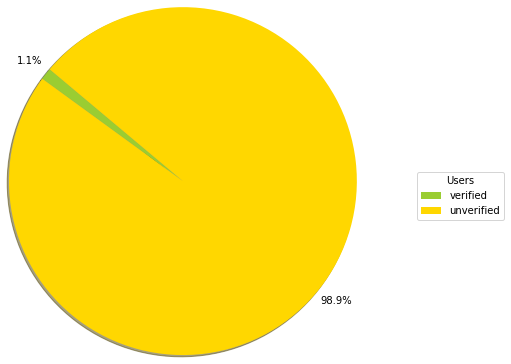

In [29]:
unverified_users = 0
verified_users = 0
for index, row in user_df.iterrows():
    if not row['verified']:
        unverified_users = unverified_users + 1
    else:
        verified_users = verified_users + 1

y_value = [verified_users, unverified_users]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'cyan']
plt.pie(y_value, shadow=True, startangle=140, radius=2,  autopct='%1.1f%%', pctdistance=1.12, colors=colors)
legend_array = ['verified', 'unverified' ]
plt.legend(legend_array, loc="lower right", title='Users', bbox_to_anchor=(2.0, 0.3))
plt.show()


## User's Followers vs User's Following 

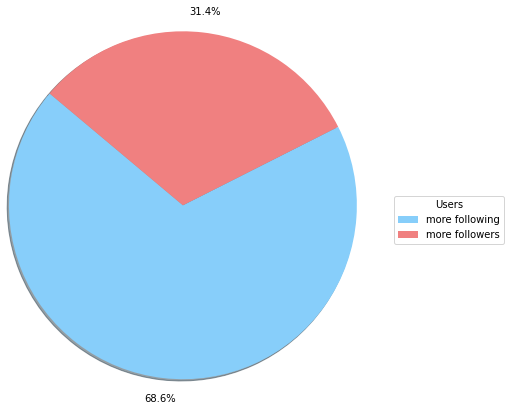

In [30]:
following_users = 0
follower_users = 0
for index, row in user_df.iterrows():
    if row['following'] > row['followers']:
        following_users = following_users + 1
    else:
        follower_users = follower_users + 1
        
y_value = [following_users, follower_users] 
colors = ['lightskyblue', 'lightcoral', 'lightskyblue', 'lightcoral', 'cyan']
plt.pie(y_value, shadow=True, startangle=140, radius=2,  autopct='%1.1f%%', pctdistance=1.12, colors=colors)
legend_array = ['more following', 'more followers' ]
plt.legend(legend_array, loc="lower right", title='Users', bbox_to_anchor=(2.0, 0.3))
plt.show()

## Age of User's Account

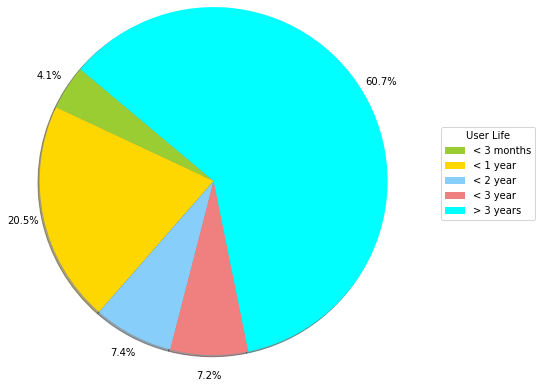

In [28]:
import datetime
base = datetime.datetime.today()
date_list = [base - datetime.timedelta(days=x) for x in range(0, 365*10, 30)]

base_dates = [date_list[3], date_list[12], date_list[24], date_list[37]]
freq_dates = []

for date in base_dates:
#     print(date.date())
    freq_dates.append(0)
    
freq_dates.append(0)
    
for index, row in user_df.iterrows():
    
    done = False
    for idx, last in enumerate(base_dates):
        if last.date() <= datetime.datetime.strptime(row['join_date'], '%Y-%m-%d').date():
            freq_dates[idx] = freq_dates[idx] + 1
            done = True
            break
    if not done:
        freq_dates[-1] = freq_dates[-1] + 1

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'cyan']
plt.pie(freq_dates, shadow=True, startangle=140, radius=2,  autopct='%1.1f%%', pctdistance=1.12, colors=colors)
legend_array = ['< 3 months', '< 1 year', '< 2 year', '< 3 year', '> 3 years' ]
plt.legend(legend_array, loc="lower right", title='User Life', bbox_to_anchor=(2.0, 0.3))
plt.show()